<a href="https://colab.research.google.com/github/Swathishdark/Yulu-Hypothesis-Testing/blob/main/Yulu_Business_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##About Yulu

Yulu is an Indian startup founded in 2017, offering sustainable urban mobility solutions through shared electric vehicles (EVs). It provides lightweight electric bikes, known as Yulu Miracle, designed for short-distance travel in cities. Yulu operates on a dockless model, allowing users to rent and drop off bikes at any designated Yulu Zone via its mobile app. The company is known for its eco-friendly approach, contributing to reduced urban pollution. Yulu has partnered with city governments and private entities, including Uber, and employs a battery-swapping model to ensure efficiency. Expanding across major Indian cities, Yulu is at the forefront of sustainable urban transportation.

In [47]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from scipy.stats import ttest_ind,f_oneway, levene, kruskal, shapiro, chi2_contingency
from statsmodels.graphics.gofplots import qqplot

import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
csv_path = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089"
df = pd.read_csv(csv_path, delimiter=",")

In [49]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [50]:
print(f"# rows: {df.shape[0]} \n# columns: {df.shape[1]}")

# rows: 10886 
# columns: 12


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Attributes Requiring Data Type Adjustments:

`datetime` from object to datetime

`season` from int64 to category

`holiday` from int64 to category

`workingday` from int64 to category

`weather` from int64 to category

In [52]:
# Convert 'datetime' from object to datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# List of columns to convert to 'category'
col_categories = ['season', 'holiday', 'workingday', 'weather']

# Convert each specified column to 'category' using a for loop
for col in col_categories:
    df[col] = df[col].astype('object')

In [53]:
df.iloc[:, 1:].describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


The dataset is complete with no missing values.

However, the casual and registered attributes likely contain outliers, as indicated by the significant difference between their mean and median, and high standard deviations (49.96 and 151.04, respectively).

In [54]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


There are no missing values in the dataset

In [55]:
df['datetime'].min(), df['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [56]:
df[col_categories].melt().groupby(['variable', 'value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

###Univariate Analysis

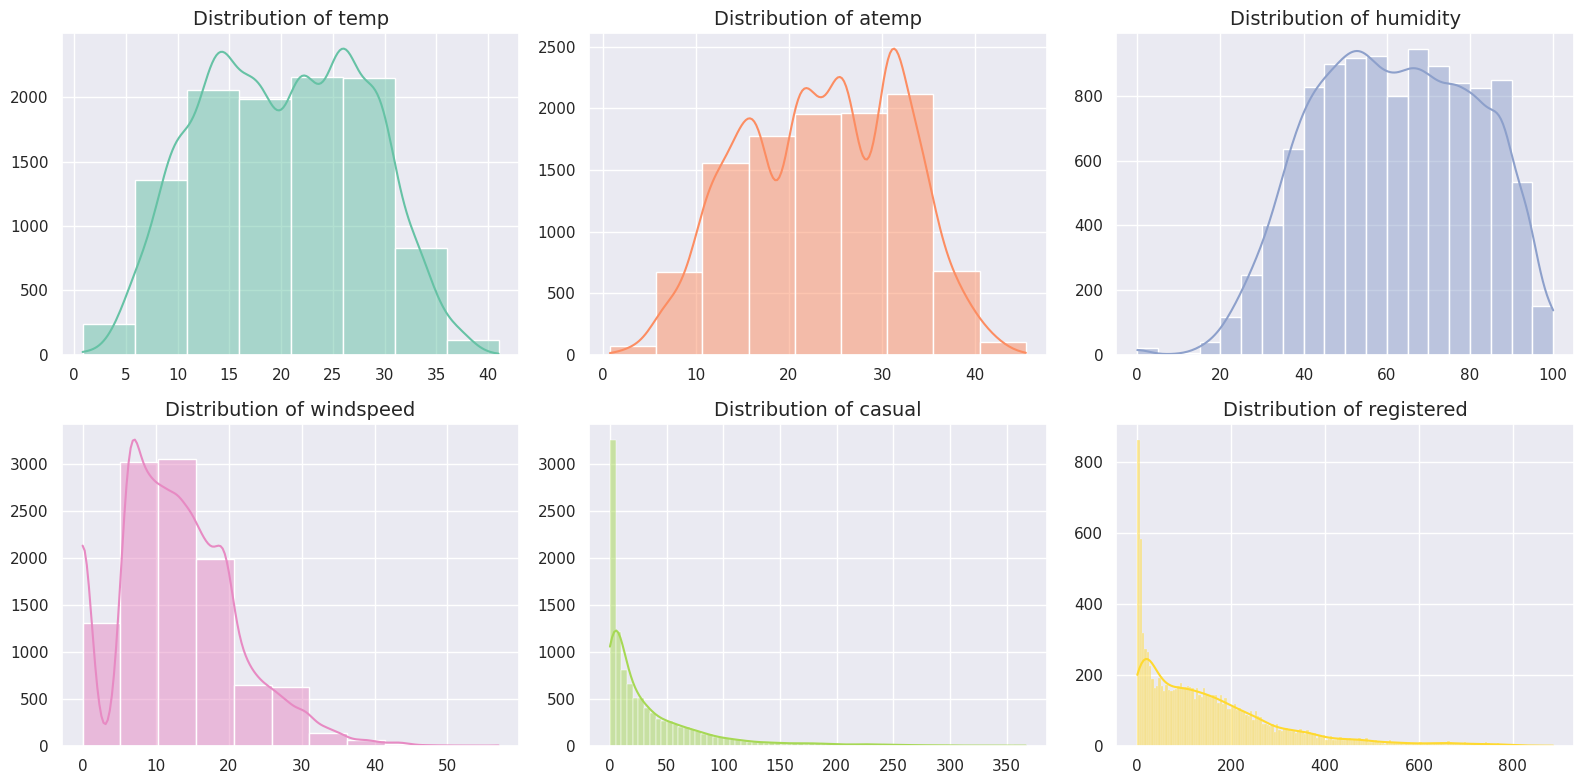

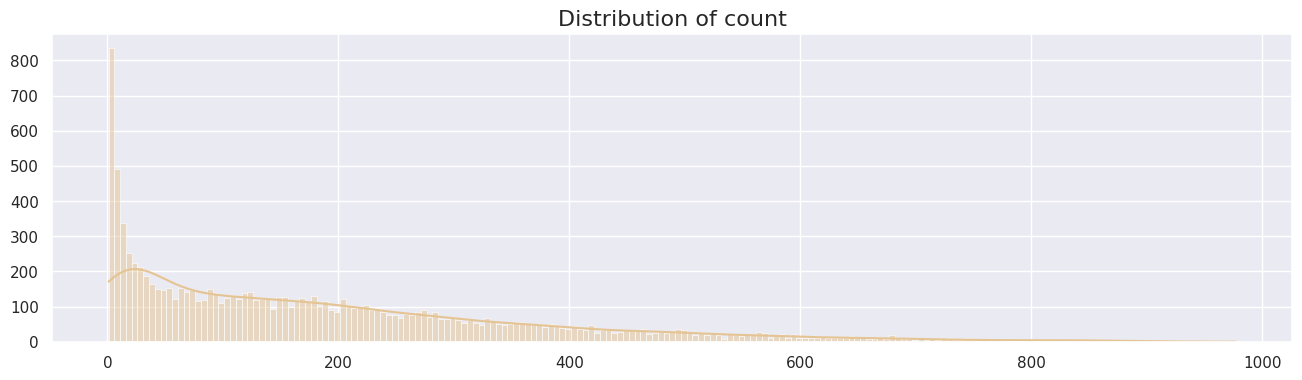

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

colors = sns.color_palette("Set2", n_colors=len(num_cols))

for index, col in enumerate(num_cols[:-1]):
    row, col_num = divmod(index, 3)
    sns.histplot(df[col], ax=axes[row, col_num], kde=True, color=colors[index], binwidth=5)
    axes[row, col_num].set_title(f'Distribution of {col}', fontsize=14)
    axes[row, col_num].set_xlabel('')
    axes[row, col_num].set_ylabel('')

plt.tight_layout()

fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(df[num_cols[-1]], kde=True, color=colors[-1], binwidth=5, ax=ax)
ax.set_title(f'Distribution of {num_cols[-1]}', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(True)

plt.show()

- **`casual`, `registered`, and `count`**: These attributes appear to follow a log-normal distribution, characterized by a right-skewed pattern with a long tail.
- **`temp`, `atemp`, and `humidity`**: These attributes seem to approximate a normal distribution, exhibiting a bell-shaped curve.
- **`windspeed`**: This attribute appears to follow a binomial distribution, which is often indicated by a discrete set of values with varying frequencies.

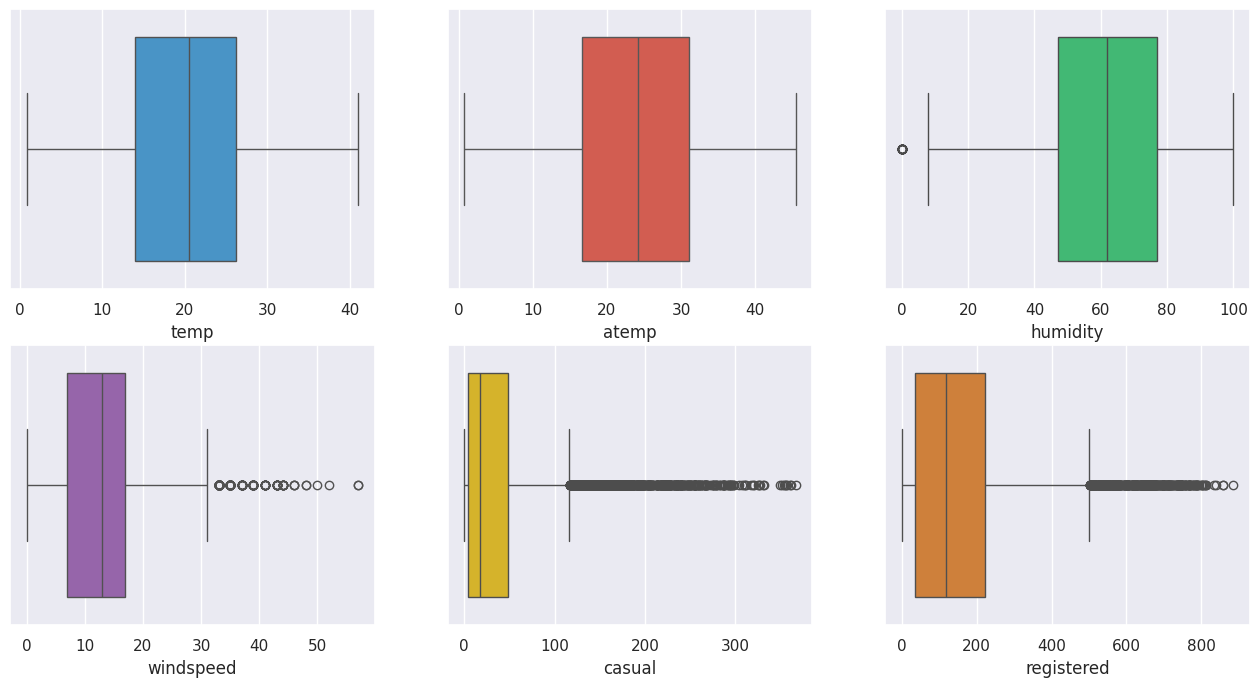

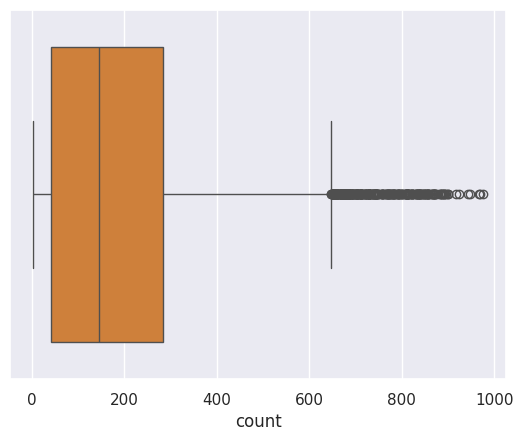

In [58]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

custom_colors = ["#3498db", "#e74c3c", "#2ecc71", "#9b59b6", "#f1c40f", "#e67e22"]

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col], color=custom_colors[index])
        index += 1

plt.show()

sns.boxplot(x=df[num_cols[-1]], color=custom_colors[-1])
plt.show()

It appears that there are outliers in the `humidity`, `windspeed`, `casual`, `registered`, and `count` data.


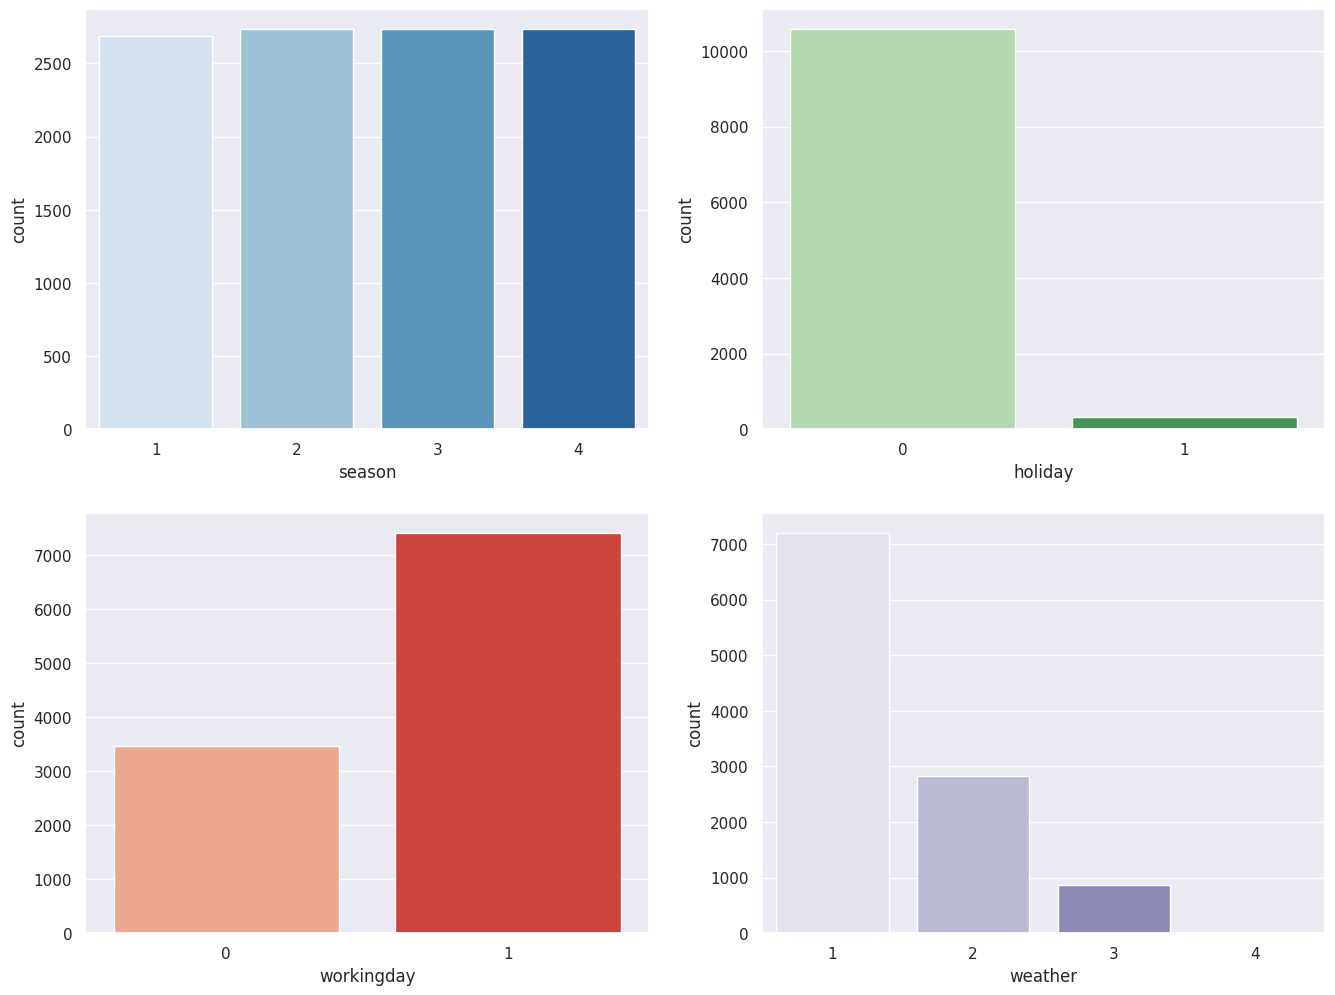

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

palettes = ["Blues","Greens","Reds","Purples"]

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=col_categories[index], ax=axis[row, col], palette=palettes[index])
        index += 1

plt.show()

**Season Distribution:** The number of days is almost evenly distributed across all four seasons, indicating balanced seasonal data collection.

**Holiday Count:** The majority of the days are non-holidays, with very few holidays recorded. This suggests that the data predominantly covers regular working days.

**Working Day Distribution:** There are more working days than non-working days, reflecting a focus on weekdays or days when people are generally working.

**Weather Conditions:** The most common weather condition is "Clear, Few clouds, partly cloudy, partly cloudy," followed by other conditions with a significantly lower count. This indicates that the data largely represents favorable weather conditions.

###Bi-variate Analysis

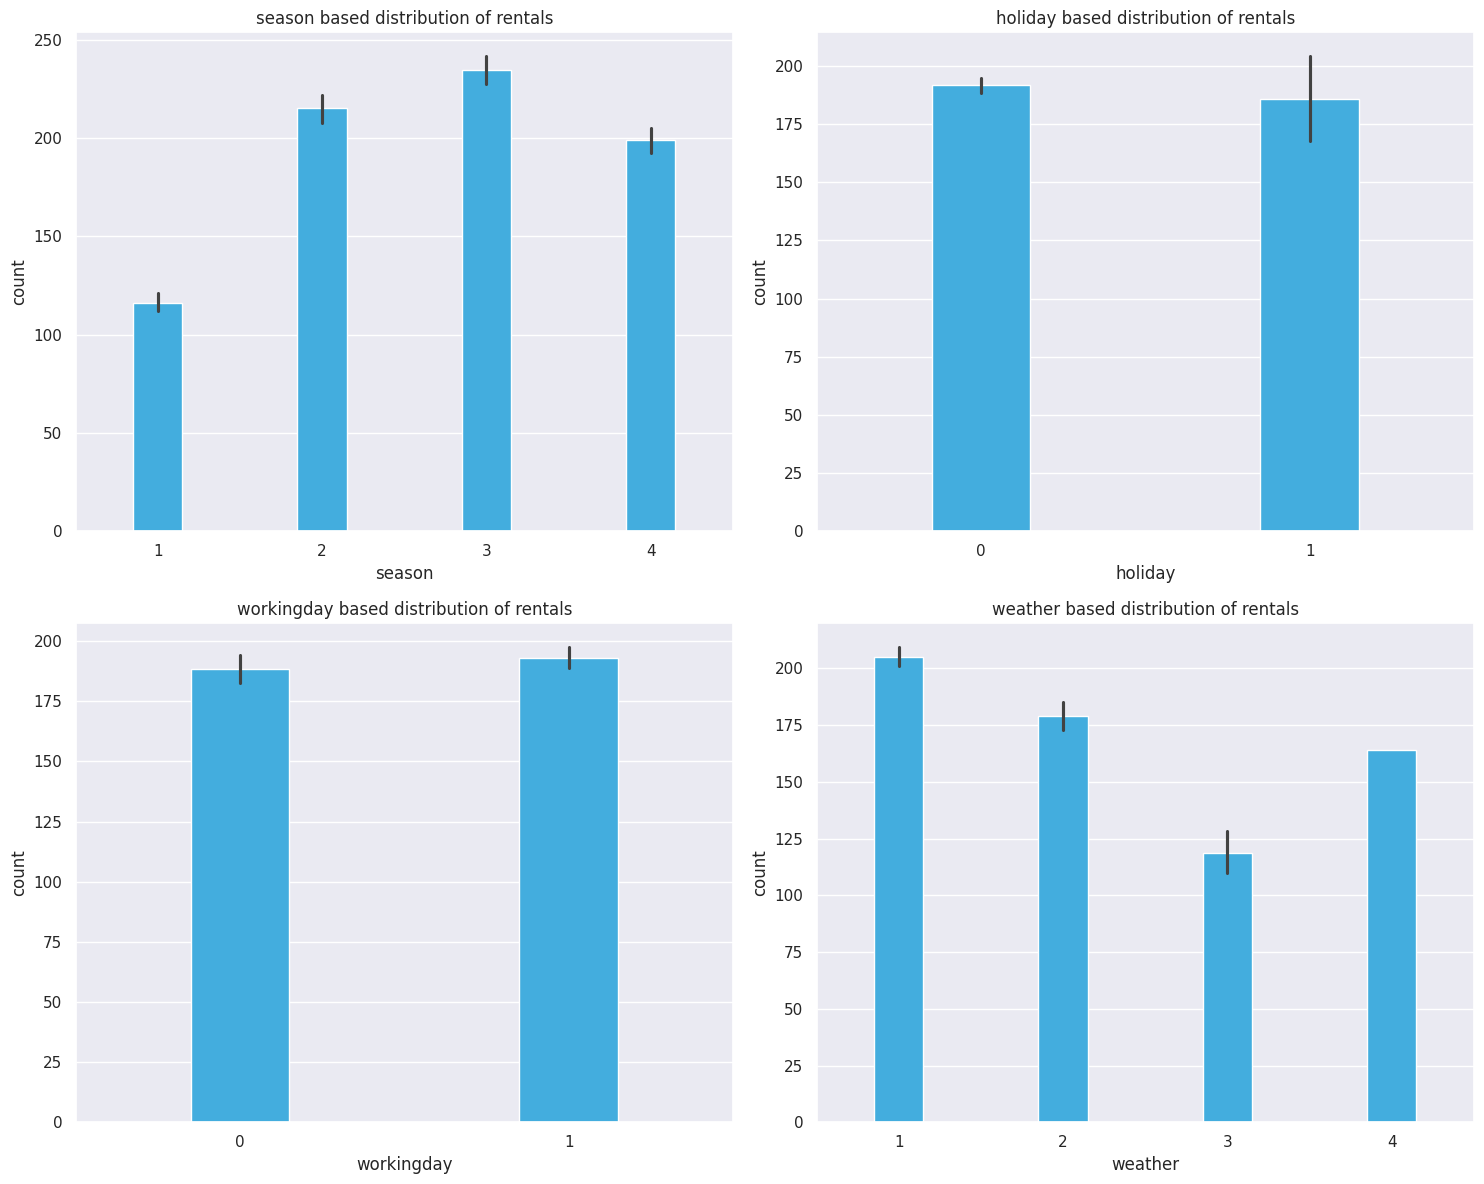

In [60]:
# barplot of categories

plt.figure(figsize=(15, 12))
sns.set(style="darkgrid")

for i, column in enumerate(col_categories,1):
    plt.subplot(2, 2, i)
    sns.barplot(x=column, y='count', data=df, color="#29B6F8", width = 0.3)
    plt.title(f'{column} based distribution of rentals')

plt.tight_layout()
plt.show()

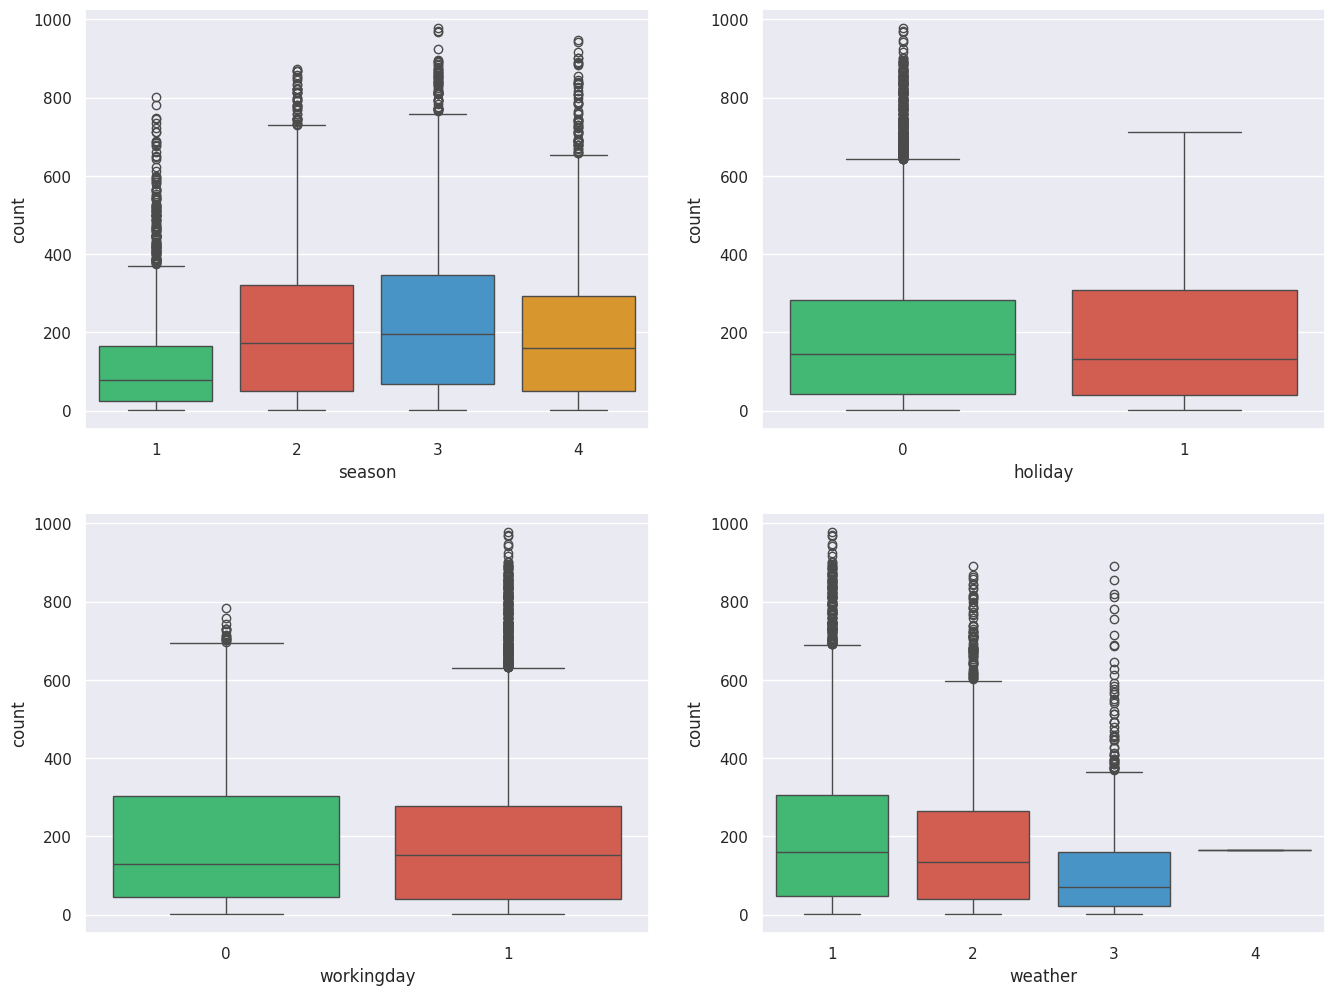

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = ["#2ecc71", "#e74c3c", "#3498db", "#f39c12"]

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=col_categories[index], y='count', ax=axis[row, col], palette=custom_palette)
        index += 1

plt.show()

**Steady Seasonal Usage:** Yulu bikes are used consistently across different seasons, with only slight increases during certain periods, possibly due to favorable weather or increased outdoor activities.

**Unchanged Holiday Behavior:** Yulu users maintain their riding habits regardless of holidays, indicating the platform’s integration into daily routines.

**Commuting Patterns:** The slightly higher variability on working days suggests Yulu bikes play a role in daily commuting, with potential spikes in usage during rush hours or workdays.

**Weather-Dependent Usage:** Weather plays a crucial role in Yulu usage, with clear or mildly cloudy weather encouraging rides, while adverse weather leads to a drop in activity.

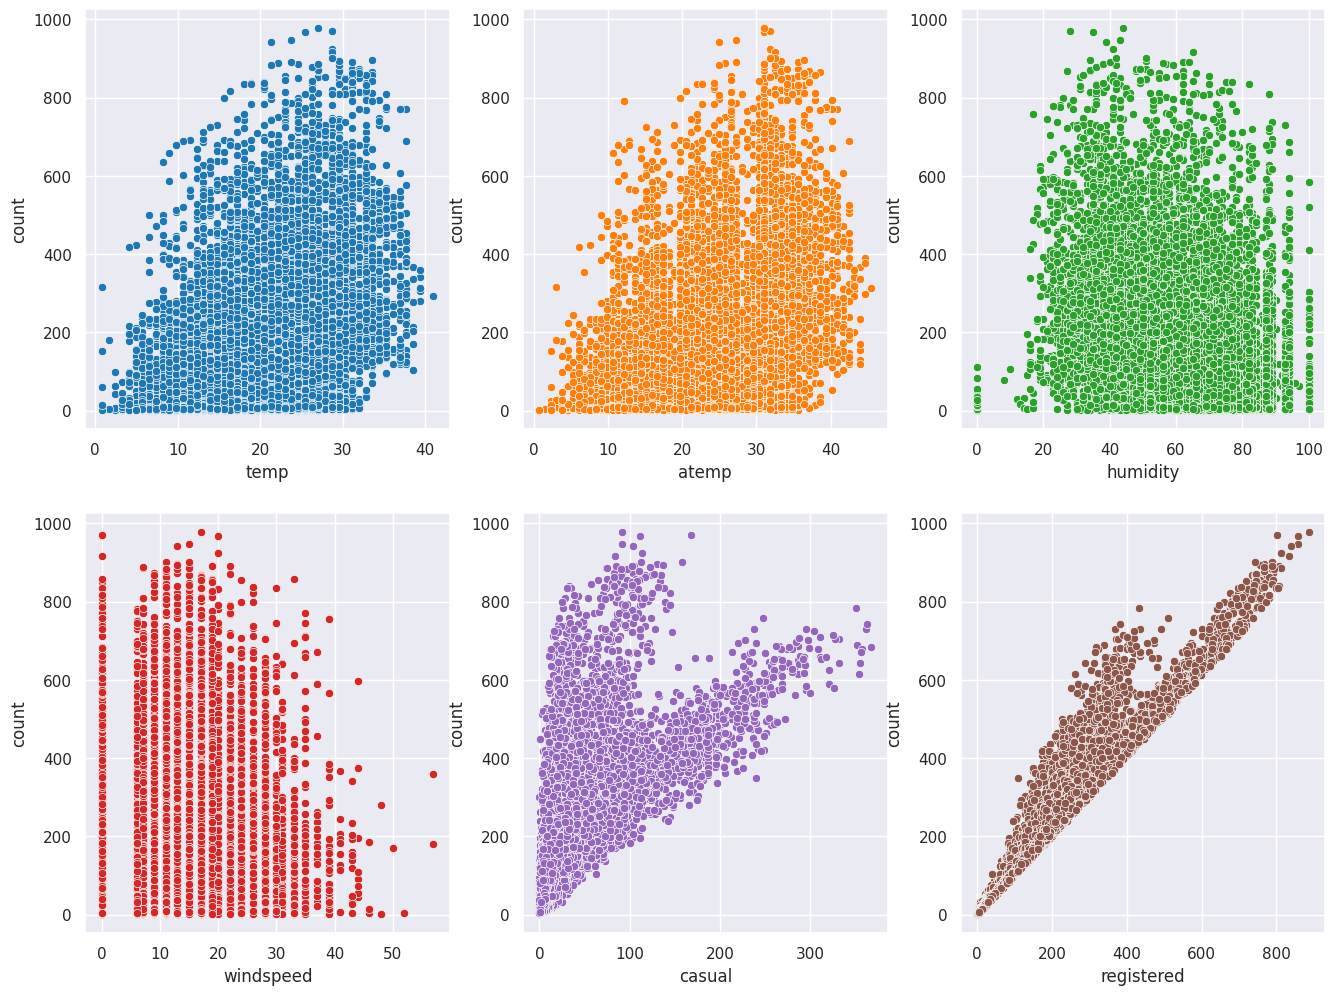

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row, col], color=colors[index])
        index += 1

plt.show()


* When temperature is above 25°C, the number of bikes rented increases significantly.
* When perceived temperature (atemp) is above 30°C, rentals see a noticeable spike.
* When humidity exceeds 80%, bike rentals tend to drop off.
* When windspeed is above 20 km/h, the number of bikes rented decreases.
* When the number of casual users exceeds 200, total rentals are consistently higher.
* When the number of registered users is above 600, overall bike rentals peak.

In [63]:
# corrrelation analysis

correlation_matrix = df[["atemp", "temp", "humidity", "windspeed", "casual", "registered", "count"]].corr()
correlation_df = pd.DataFrame(correlation_matrix)
correlation_df

,atemp,temp,humidity,windspeed,casual,registered,count
atemp,1.000000,0.984948,-0.043536,-0.057473,0.462067,0.314635,0.389784
temp,0.984948,1.000000,-0.064949,-0.017852,0.467097,0.318571,0.394454
humidity,-0.043536,-0.064949,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.057473,-0.017852,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.462067,0.467097,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.314635,0.318571,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.389784,0.394454,-0.317371,0.101369,0.690414,0.970948,1.000000


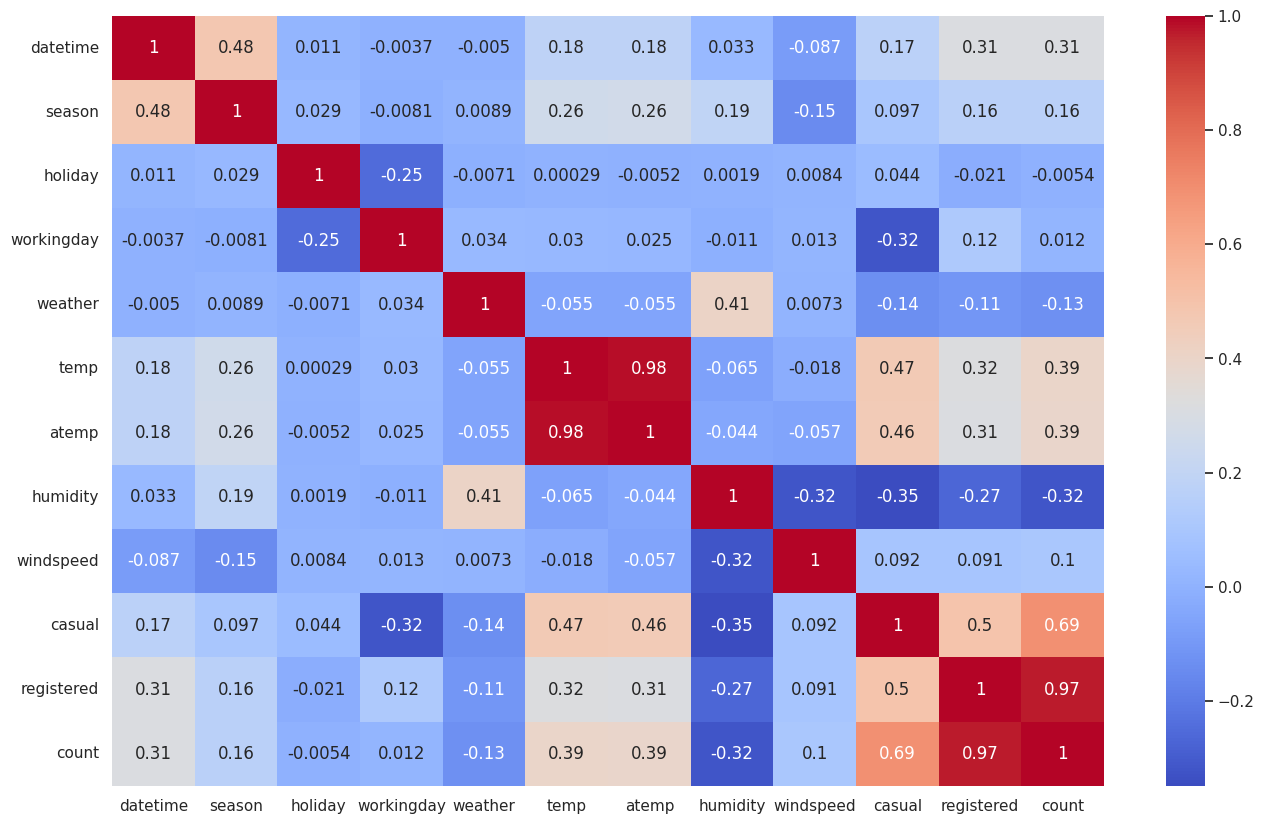

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16, 10))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.show()

* Registered users are the main drivers of bike rentals, with warmer temperatures also contributing to higher rentals.

* However, high humidity tends to reduce rentals, especially among casual users.

* Rentals are lower on working days for casual users, and there is some seasonal variation in rentals.

##Hypothesis Testing

We aim to determine if the demand for bicycles is the same on weekdays and weekends. Given that we have two independent samples, we'll use a Two-Sample Independent T-Test.

Assumptions for the Two-Sample Independent T-Test:

The data should be normally distributed.
The variances of the two groups should be equal.
With a confidence level of 95%, the significance level (alpha) is set to 0.05.

To verify the normality of the data, we will perform the Shapiro-Wilk test. The hypotheses for the Shapiro-Wilk test are:

Null Hypothesis (H0): The data is normally distributed.
Alternative Hypothesis (H1): The data is not normally distributed.

In [65]:
np.random.seed(41)

df_subset = df.sample(100)["count"]

test_stat, p_val = shapiro(df_subset)

p_val

2.6341210395843134e-07

### QQ Plot analysis

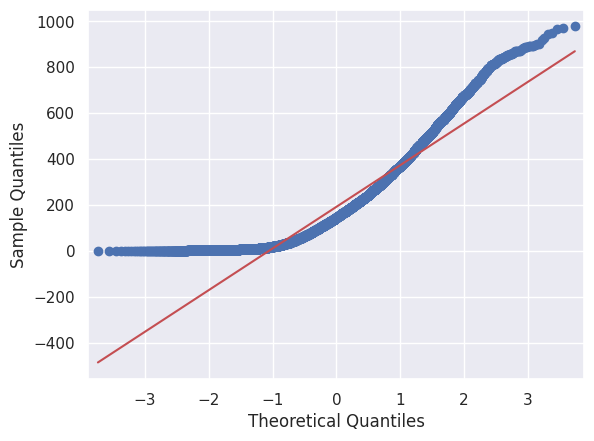

In [66]:
# QQ plot

qqplot(df['count'], line = 's')
plt.show()

### To check if the variances of two groups are equal. We will perform Levene's test

* Ho: The variances are equal.

* Ha: The variances are not equal.

In [67]:
working_day = df[df['workingday'] == 'Yes']['count']

holiday = df[df['workingday'] == 'No']['count']

levene_stat, p_val = levene(working_day, holiday)

p_val

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


nan

<Axes: xlabel='count', ylabel='Density'>

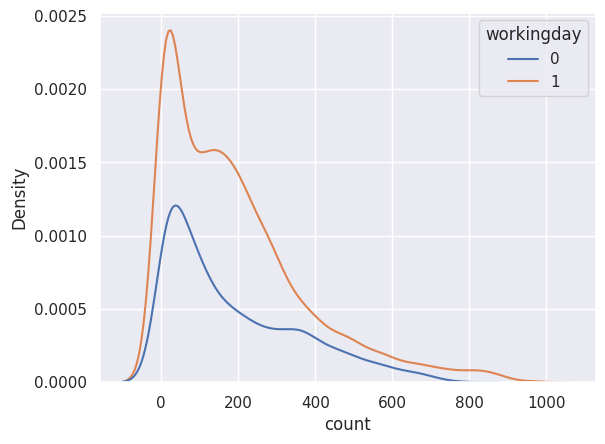

In [68]:
sns.kdeplot(data = df, x = 'count', hue = 'workingday')

<Axes: xlabel='count', ylabel='Count'>

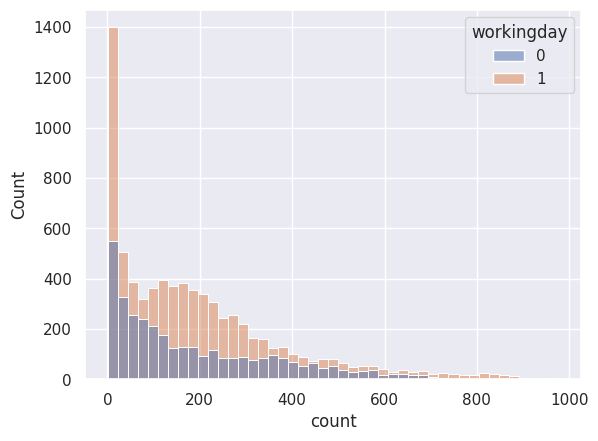

In [69]:
sns.histplot(data = df, x = 'count', hue = 'workingday')

Even though the data does not follow a normal distribution according to both the Shapiro-Wilk test and the QQ plot, it is important to note that the variances between the two groups are equal.

Therefore, we can still proceed with the Two-Sample Independent T-Test.

##**Hypothesis Testing - 1**

Null Hypothesis (H0): Weather conditions are independent of the season.

Alternate Hypothesis (H1): Weather conditions are dependent on the season.

Significance Level (α): 0.05

To test the hypothesis, we will use the chi-square test for independence.

In [75]:
data_table = pd.crosstab(df['season'], df['weather'])
print("values:")
data_table

values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [78]:
contingency_table = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
print(contingency_table)

chi2_statistic, p_value, degrees_of_freedom, expected_values = stats.chi2_contingency(contingency_table)

print("\nExpected values:")
print(expected_values)

print(f"\nDegrees of freedom: {degrees_of_freedom}")

alpha = 0.05

print(f"Chi-square test statistic: {chi2_statistic}")
print(f"P-value: {p_value}")

critical_value = stats.chi2.ppf(q=1-alpha, df=degrees_of_freedom)
print(f"Critical value: {critical_value}")

if p_value <= alpha:
    print("\nThe p-value is less than the significance level of 0.05. Therefore, we reject the null hypothesis. Weather is dependent on the season.")
else:
    print("The p-value is greater than the significance level of 0.05. Therefore, we do not reject the null hypothesis. Weather is independent of the season.")

Observed values:
weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0

Expected values:
[[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]

Degrees of freedom: 9
Chi-square test statistic: 49.158655596893624
P-value: 1.549925073686492e-07
Critical value: 16.918977604620448

The p-value is less than the significance level of 0.05. Therefore, we reject the null hypothesis. Weather is dependent on the season.


### Demand of bicycles on rent is the same for different Seasons

Here also we have more than two categories now, so will use ANNOVA here.

**Assumptions for ANNOVA are:**

1. The population data should be normally distributed- The data is not normal as verified by **Wilkin-Shapiro test and the qqplot.**<br><br>

2. The data points must be independent- This condition is satisfied.<br><br>

3. Approximately equal variance within groups- This will be verified using **Levene's test.**

In [79]:
# skewness of weather

df.groupby('weather')['count'].skew()

,count
weather,
1,1.139857
2,1.294444
3,2.187137
4,NaN


In [80]:
# kurtosis test of weather

df.groupby('weather')['count'].apply(lambda x: x.kurtosis())

,count
weather,
1,0.964720
2,1.588430
3,6.003054
4,NaN


<Axes: xlabel='count', ylabel='Density'>

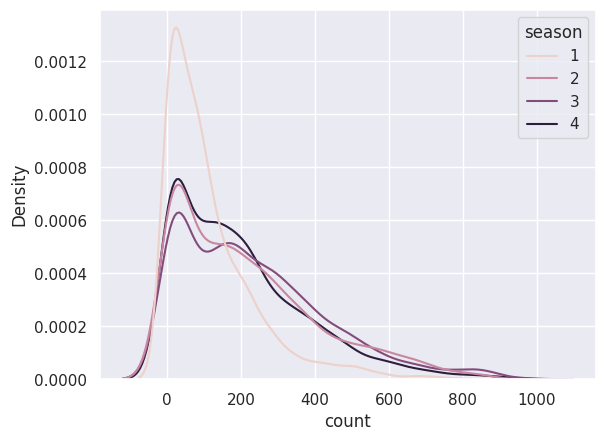

In [85]:
sns.kdeplot(data = df, x = 'count', hue = 'season')

From the KDE plot, the density curve for spring is higher compared to other seasons, it shows that the count of bicycle rentals is generally higher in spring.

<Axes: xlabel='count', ylabel='Count'>

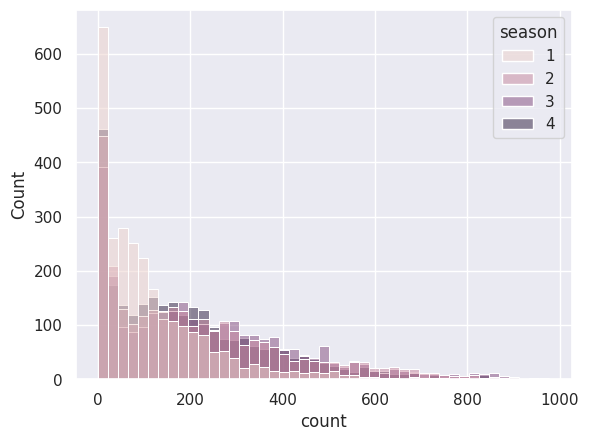

In [82]:
sns.histplot(data = df, x = 'count', hue = 'season')

##**Hypothesis Testing - 2**

**Null Hypothesis:** Working day has no effect on the number of cycles being rented.

**Alternate Hypothesis:** Working day has effect on the number of cycles being rented.

**Significance level (alpha):** 0.05

We will use the 2-Sample T-Test to test the hypothess defined above

In [87]:
data_group1 = df[df['workingday']==0]['count'].values
data_group2 = df[df['workingday']==1]['count'].values

np.var(data_group1), np.var(data_group2)

(30171.346098942427, 34040.69710674686)

Before performing the two-sample T-Test, we need to check if the variances of the two data groups are equal. If the ratio of the larger variance to the smaller variance is less than 4:1, we can assume that the variances are equal.

In this case, the ratio of the larger variance (34,040.70) to the smaller variance (30,171.35) is less than 4:1, indicating that the variances can be considered equal.

In [88]:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

TtestResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)

Since the p-value is greater than 0.05, we cannot reject the null hypothesis. This means we do not have sufficient evidence to conclude that working days affect the number of cycles rented.

Null Hypothesis (H0): The number of cycles rented is similar across different weather conditions and seasons.

Alternative Hypothesis (H1): The number of cycles rented varies across different weather conditions and seasons.

Significance Level (alpha): 0.05

In this case, we will use ANOVA to test the hypothesis.

In [89]:
gp1 = df[df['weather']==1]['count'].values
gp2 = df[df['weather']==2]['count'].values
gp3 = df[df['weather']==3]['count'].values
gp4 = df[df['weather']==4]['count'].values

gp5 = df[df['season']==1]['count'].values
gp6 = df[df['season']==2]['count'].values
gp7 = df[df['season']==3]['count'].values
gp8 = df[df['season']==4]['count'].values

stats.f_oneway(gp1, gp2, gp3, gp4, gp5, gp6, gp7, gp8)

F_onewayResult(statistic=127.96661249562491, pvalue=2.8074771742434642e-185)

Based on the ANOVA results, here are the insights:

**ANOVA Test Statistic:** The F-statistic is 127.97. This value measures the ratio of the variance between groups to the variance within groups. A higher F-statistic indicates a greater difference between group means relative to the variability within the groups.

**P-Value:** The p-value is approximately \(2.81 \times 10^{-185}\) which is extremely small.

* Statistical Significance: Given that the p-value is much less than the significance level of 0.05, we reject the null hypothesis. This indicates that there are significant differences in the number of cycles rented across different weather conditions and seasons.

* Effect Size: The large F-statistic suggests a strong effect, meaning the variance in the number of rented cycles between different weather conditions and seasons is significantly greater than the variance within each group.

* Practical Implications: The results suggest that both weather conditions and seasons have a significant impact on bicycle rental counts. This implies that operational strategies, marketing efforts, and resource allocation should consider these factors to optimize bicycle availability and improve customer satisfaction.

##**Insights**

*Seasonal Rental Patterns:*

- More bikes are rented during the summer and fall seasons compared to other seasons. This suggests that demand is higher in these seasons, likely due to favorable weather conditions and increased outdoor activities.

*Holiday Effect:*

- Rentals increase on holidays. This indicates that people are more likely to rent bikes during holidays, possibly for recreational purposes or leisure activities.

*Weekend and Working Day Impact:*

- Slightly more bikes are rented on weekends and holidays compared to regular working days. However, this difference is not statistically significant, suggesting that working days do not have a major impact on rental demand.

*Weather Conditions:*

- Rain, thunderstorms, snow, and fog are associated with lower bike rentals. Adverse weather conditions tend to reduce the likelihood of people renting bikes.

*Humidity Levels:*

- When humidity is below 20%, bike rentals are very low. This suggests that extremely low humidity levels might be uncomfortable or undesirable for cycling.

*Temperature Effects:*

- Rentals decrease when the temperature is below 10°C. Cold temperatures can deter people from renting bikes due to discomfort or adverse conditions.

*Windspeed Impact:*

- High wind speeds (greater than 35 km/h) are linked to lower bike rentals. Strong winds can make cycling less pleasant and more challenging, reducing the demand for rentals.

**Recommendations**

*Seasonal Inventory Management:*

- Increase the number of bikes available during summer and fall to meet the higher demand in these seasons.

*Holiday Planning:*

- Ensure adequate bike availability during holidays to capitalize on the increased rental demand.

*Operational Adjustments for Weather:*

- Reduce bike stock during adverse weather conditions such as heavy rain, thunderstorms, snow, or fog to align with lower demand.
- On very low humidity days, consider having fewer bikes available as the demand is significantly reduced.
- Similarly, reduce bike availability when temperatures drop below 10°C or during very cold days.
- Decrease the number of bikes in stock during high wind conditions or thunderstorms.

*Data-Driven Stock Management:*

- Use historical data and weather forecasts to adjust bike inventory dynamically, ensuring optimal availability and reducing operational costs during periods of low demand.